In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x105fc71f0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from gfcat_utils import *

In [3]:
import numpy as np
from astropy.io import fits as pyfits
from astropy import wcs as pywcs
from astropy.visualization import simple_norm, ZScaleInterval
from photutils import DAOStarFinder, CircularAperture, aperture_photometry


In [4]:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [5]:
fn = '/Users/cm/GFCAT/data/e42907/e42907-nd-full.fits.gz'
fn = '/Users/cm/GFCAT/data/e05748/e05748-nd-full.fits.gz'

In [34]:
image,flagmap,edgemap,wcs,tranges,exptimes=read_image(fn)
image[np.where(np.isinf(image))]=0 # because it pops out with inf values... IDK
intensity_map = image / exptimes[0]
ix = np.where(image>0)
print(np.min(intensity_map[ix]),np.max(intensity_map[ix]),
      np.mean(intensity_map[ix]),np.median(intensity_map[ix]))
print(exptimes)

0.0015666535754905227 38.62128479457103 0.0049454501744888 0.003844268581695001

[541.8471262523176]

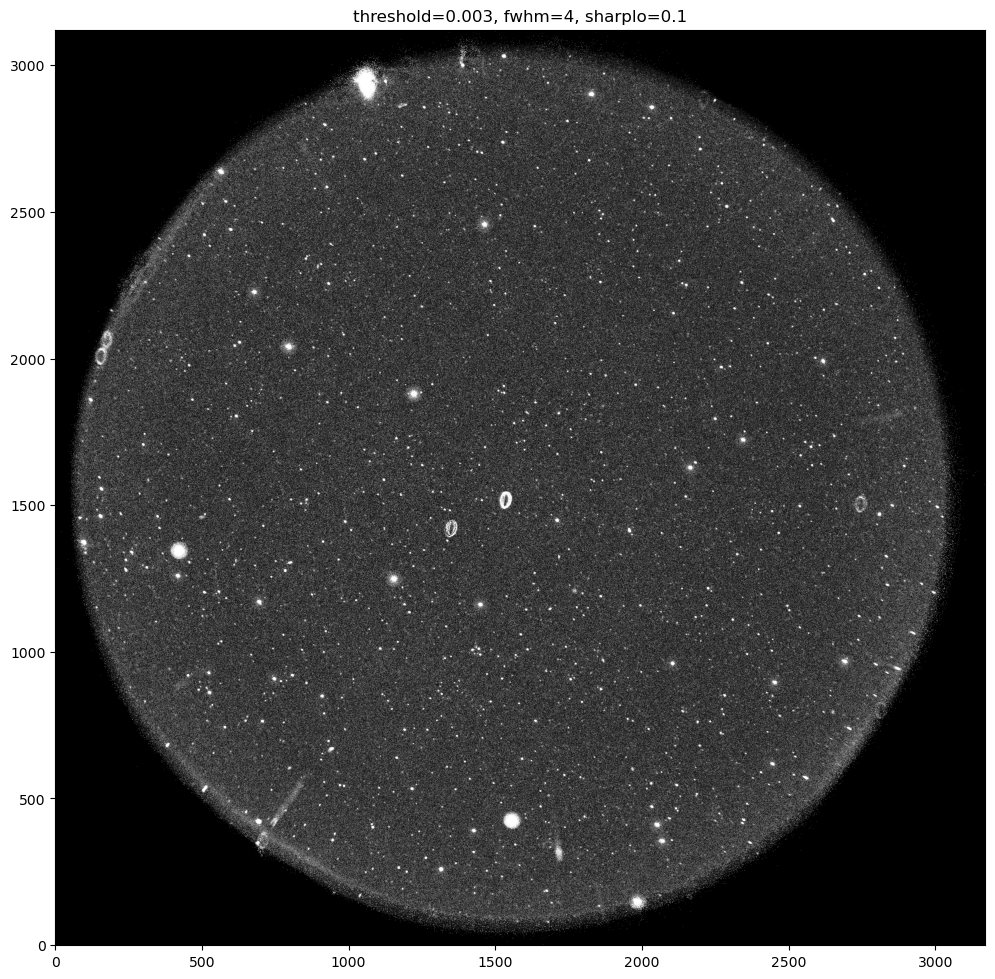

In [19]:
plt.figure(figsize=(12,12))
plt.title(f"threshold={threshold}, fwhm={fwhm}, sharplo={sharplo}")
plt.imshow(ZScaleInterval()(image),cmap="Greys_r",origin="lower")

0.0015666535754905227 38.62128479457103 0.0049454501744888 0.003844268581695001

0.848886737712458 20926.832178110642 2.6796779650707774 2.083005883533509

[0.00465352]

[541.8471262523176]

0.011073233960838667

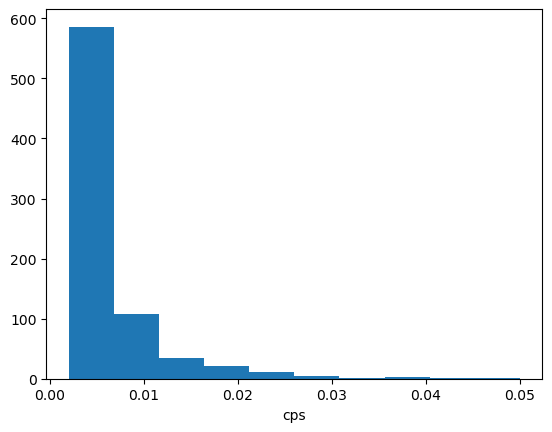

In [38]:
print(np.min(intensity_map[ix]),np.max(intensity_map[ix]),
      np.mean(intensity_map[ix]),np.median(intensity_map[ix]))
print(np.min(image[ix]),np.max(image[ix]),
      np.mean(image[ix]),np.median(image[ix]))

ix = np.where(image>0)
cps = (intensity_map[ix] / exptimes[0]).flatten()
plt.hist(cps,#,bins=100)#,
         range=[0.002,0.05]);
plt.xlabel('cps')
#print(len(x))
#plt.xlim([np.min(intensity_map[ix]),np.mean(intensity_map[ix])])
print(np.percentile(cps,[99.995]))
print(exptimes)
print(6/exptimes[0])

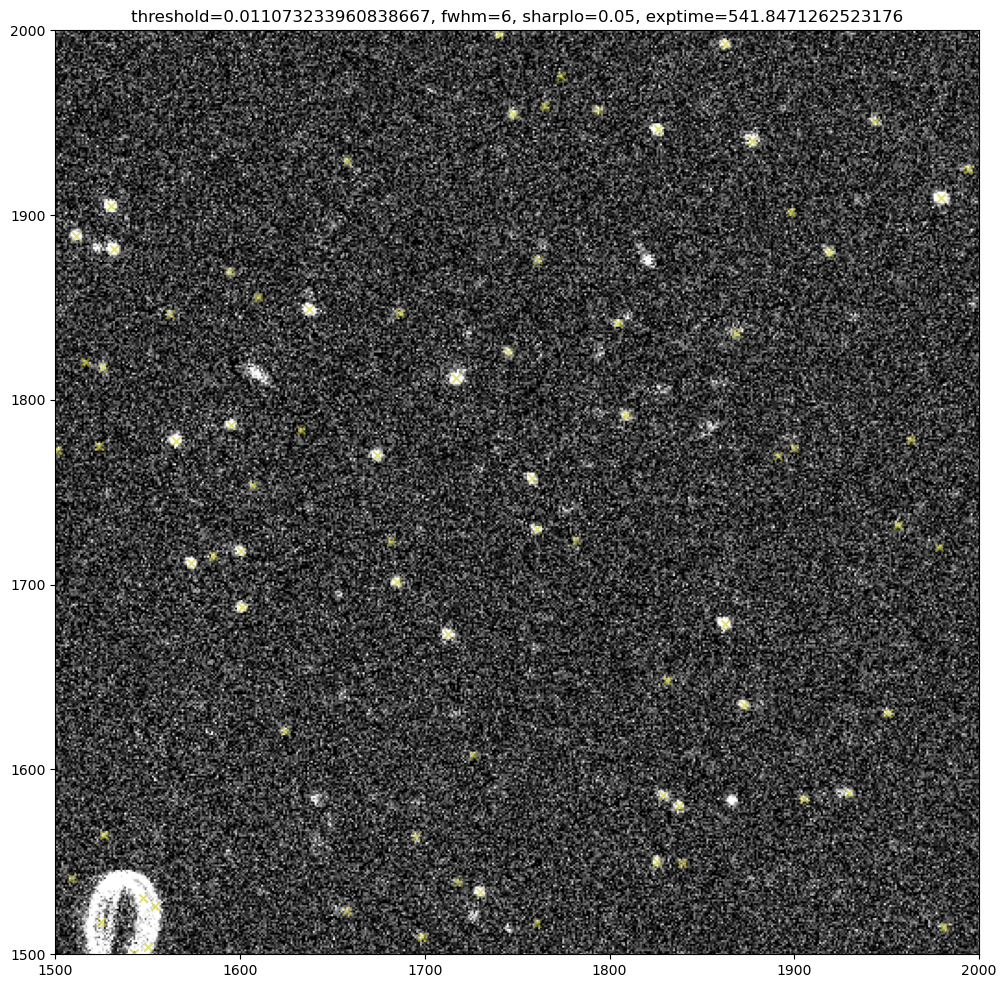

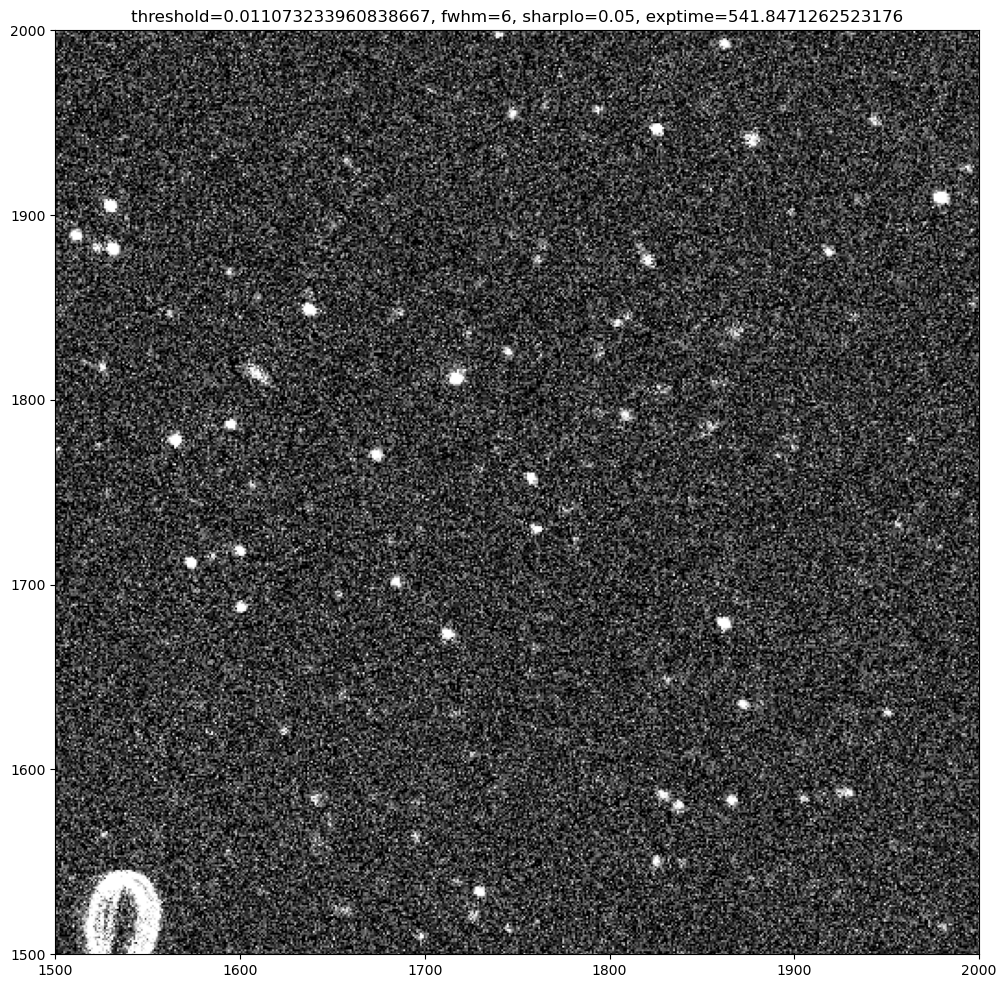

In [41]:
#    threshold,fwhm,
#    ratio=1.0,theta=0.0,
#    sigma_radius=1.5,sharplo=0.2,sharphi=1.0,
#    roundlo=-1.0,roundhi=1.0,sky=0.0,

for threshold in [6/exptimes[0]]:#[0.003,0.004,0.005,0.006]:
    for fwhm in [6]:#np.arange(1,21,5): # this is the clear leader
        for sharplo in [0.05]:
            daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold, sharplo=sharplo)
            source_table = daofind(image / exptimes[0]).to_pandas()
            x = np.array(source_table['xcentroid'].tolist())
            y = np.array(source_table['ycentroid'].tolist())
            plt.figure(figsize=(12,12))
            plt.title(f"threshold={threshold}, fwhm={fwhm}, sharplo={sharplo}, exptime={exptimes[0]}")
            plt.imshow(ZScaleInterval()(image),cmap="Greys_r",origin="lower")
            plt.scatter(x,y,c='y',marker='x',alpha=0.5)
            plt.xlim([1500,2000])
            plt.ylim([1500,2000])
            plt.figure(figsize=(12,12))
            plt.title(f"threshold={threshold}, fwhm={fwhm}, sharplo={sharplo}, exptime={exptimes[0]}")
            plt.imshow(ZScaleInterval()(image),cmap="Greys_r",origin="lower")
            #plt.scatter(x,y,c='y',marker='x',alpha=0.5)
            plt.xlim([1500,2000])
            plt.ylim([1500,2000])

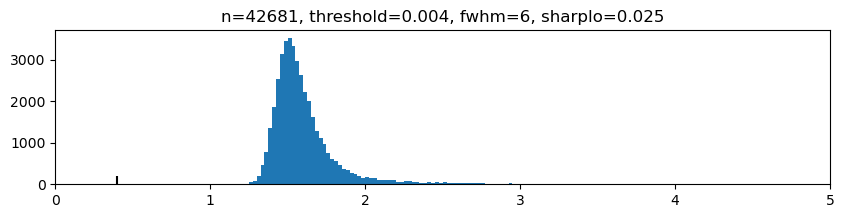

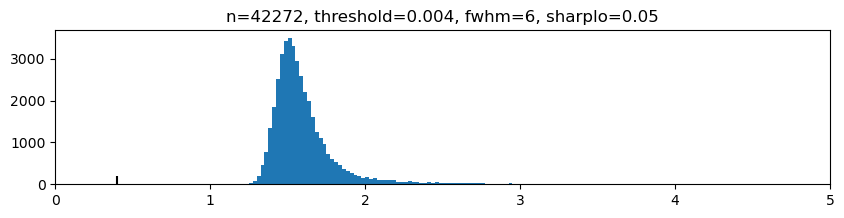

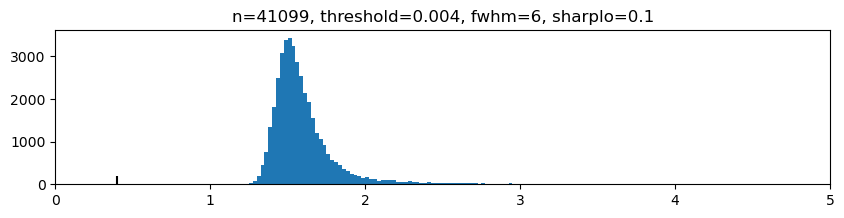

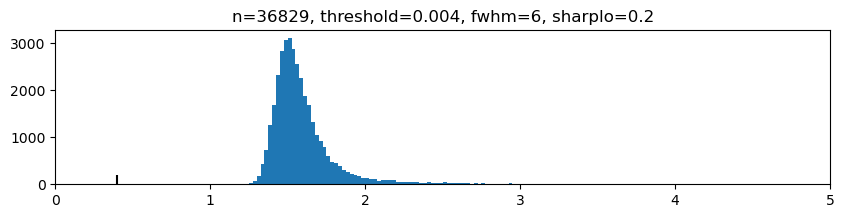

In [10]:
for threshold in [0.004]:#[0.003,0.004,0.005,0.006]:
    for fwhm in [6]:#np.arange(1,21,5): # this is the clear leader
        for sharplo in [0.025,0.05,0.1,0.2]:
            aperture_size=12.8
            daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold, sharplo=sharplo)
            source_table = daofind(image / exptimes[0]).to_pandas()
            positions = source_table[["xcentroid", "ycentroid"]].values
            apertures = CircularAperture(positions, r=aperture_size)
            phot_table = aperture_photometry(image, apertures).to_pandas()
            cps = np.array(phot_table.aperture_sum / exptimes[0])
            n = len(cps)
            plt.figure(figsize=(10,2))
            plt.title(f"n={n}, threshold={threshold}, fwhm={fwhm}, sharplo={sharplo}")
            plt.hist(cps,range=[0,5],bins=200);
            plt.vlines(0.4,0,200,color='k')
            plt.xlim([0,5])

(0.0, 5.0)

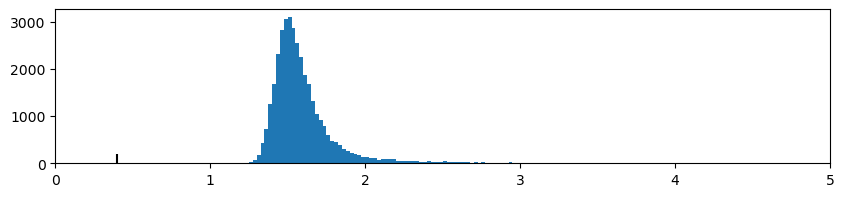

In [11]:
cps = np.array(phot_table.aperture_sum / exptimes[0])
plt.figure(figsize=(10,2))
plt.hist(cps,range=[0,5],bins=200);
plt.vlines(0.4,0,200,color='k')
plt.xlim([0,5])

In [12]:
for threshold in [0.003,0.004,0.005,0.006]:
    for fwhm in [4,5,6,7]:#np.arange(1,21,5): # this is the clear leader
        for sharplo in [0.1]:
            daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold, sharplo=sharplo)
            source_table = daofind(image / exptimes[0]).to_pandas()
            positions = source_table[["xcentroid", "ycentroid"]].values
            apertures = CircularAperture(positions, r=aperture_size)
            phot_table = aperture_photometry(image, apertures).to_pandas()

            n = len(source_table['xcentroid'].tolist())
            print(f"{n} {threshold} {fwhm} {sharplo}")
    print("----")

KeyboardInterrupt: 